In [8]:
from Model import MisinfoModel  # , draw_graph
from Visualization import *
from Agents import *
import time
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [9]:

# Parameters
visualize = False
n_agents = 1000
agent_ratio = {NormalUser.__name__: 0.99, Disinformer.__name__: 0.01}
n_edges = 3
media_literacy_intervention = (0.2, SelectAgentsBy.RANDOM)
ranking_intervention = False


max_run_length = 60

model = MisinfoModel(n_agents=n_agents,
                     n_edges=n_edges,
                     agent_ratio=agent_ratio,
                     media_literacy_intervention=media_literacy_intervention,
                     ranking_intervention=ranking_intervention)

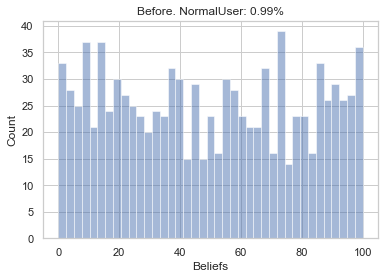

In [10]:
# Overview of the agents' belief distribution at the start
data = [agent.beliefs[str(Topic.VAX)] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'Before. NormalUser: {agent_ratio[NormalUser.__name__]}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()

In [11]:
print(f"Starting")
start_time = time.time()
for i in range(max_run_length):
    model.step()
    if i % 10 == 0:
        print(f"step {i} done")

run_time = round(time.time() - start_time, 2)
print(f"With {max_run_length} steps, runtime is {run_time}")

Starting
step 0 done
step 10 done
step 20 done
step 30 done
step 40 done
step 50 done
With 60 steps, runtime is 26.41


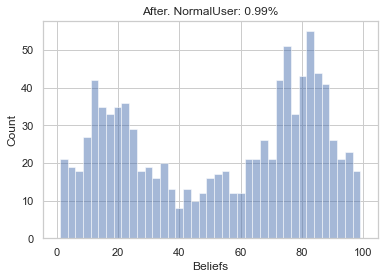

In [12]:
# Overview of the agents' belief distribution at the end
data = [agent.beliefs[str(Topic.VAX)] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'After. NormalUser: {agent_ratio[NormalUser.__name__]}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()



In [13]:
agent = model.schedule.agents[5]

diffs = agent.differences
diffs = np.array(diffs)
# diffs

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

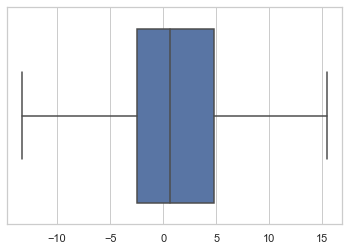

In [14]:
sns.set_theme(style="whitegrid")
sns.boxplot(diffs)